In [162]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import matplotlib.pyplot as plt

In [7]:
# web scrapper for all the data science courses in https://www.classcentral.com
Course = []
Duration = []
Start_date = []
Offered_by = []
No_Of_reviews = []
Rating = []
for i in range(1,27):
    time.sleep(random.randint(1,5))
    URL = "https://www.classcentral.com/subject/data-science?page="+str(i)
    response = requests.get(URL)
    soup = BeautifulSoup(response.content, "html.parser")       
    for j in soup.findAll("span", attrs={"class":"text-1 weight-semi line-tight"}):
        Course.append(j.text.strip())
        
    for j in soup.findAll("a", attrs={"class":"color-charcoal italic"}):
        Offered_by.append(j.text.strip())
        
    for j in soup.findAll("span", attrs={"class":"hidden medium-up-inline-block small-down-text-2 text-3 large-up-margin-left-xxsmall icon-clock-charcoal icon-left-small"}):
        text = j.text.strip()
        text = " ".join(text.split())
        Duration.append(text)
        
    for j in soup.findAll("div", attrs={"class":"col border-box text-center nowrap row large-up-text-right padding-horz-small push"}):
        tmp = j.find("span", attrs={"class":"text-4 color-charcoal block"})
        if tmp:
            Rating.append(tmp.text.strip())
        else:
            Rating.append("-1")

data = pd.DataFrame({"Course":Course,"Duration":Duration,"Start_date":Start_date,
                     "Offered_by":Offered_by,"No_Of_reviews":No_Of_reviews, "Rating":Rating})
data.to_csv("courses.csv")

In [2]:
# Web scrapper for all the shops in Thessaloniki available for delivery in e-food.gr
Shop = []
Kind = []
Rating = []
Minimum = []
No_Of_reviews = []

response = requests.get("https://www.e-food.gr/delivery/thessaloniki")
soup = BeautifulSoup(response.content, "html.parser")
for shop in soup.find_all("div", attrs={"class":"shops-listings-shops-list-item"}):
    # Save the rating
    j = shop.find("span", attrs={"class":"ml-1 my-0 font-size-18 font-weight-bold"}).text.strip()
    if j!="-":
        Rating.append(j)
    else:
        Rating.append("-1")
            
    # Save the number of the reviews
    j = shop.find("small", attrs={"class":"text-muted"}).text[1:-1]
    No_Of_reviews.append(j)
        
    # Save shop's name
    j = shop.find("h3", attrs={"class":"my-0"}).text.strip()
    Shop.append(j)
        
    # Save the category of food
    j = shop.find("span", attrs={"class":"mr-2 font-weight-bold d-none cuisine-name-category-slug"}).text.strip()
    Kind.append(j)
        
    text = shop.find("div", attrs={"class":"d-flex text-muted small flex-wrap"}).text.split()
    Minimum.append(text[text.index("Ελάχιστη")+1])

In [164]:
# Create the dataframe
data = pd.DataFrame({"Shop":Shop,"Kind":Kind,"Rating":Rating,"Reviews":No_Of_reviews,"MinEuros":Minimum})
# Change rating to float type and reviews to int type
data.Rating = data.Rating.astype("float64")
data.Reviews = data.Reviews.astype("int64")
data.MinEuros = data.MinEuros.str.replace(",",".")
data.MinEuros = data.MinEuros.apply(lambda s: s[:-1]).astype("float64")
data.to_csv("efood.csv")

In [56]:
# Top ten kind of shops based on average rating
data.groupby("Kind").mean().sort_values("Rating",ascending=False).head(10).style.background_gradient(cmap="vlag")

,Rating,Reviews,MinEuros
Kind,,,
Smoothies,4.800000,515.000000,3.000000
Κινέζικη,4.750000,188.250000,7.500000
Φαλάφελ,4.733333,213.666667,7.500000
Πατσάς,4.650000,61.000000,7.500000
Βάφλες,4.566667,66.000000,6.500000
Μεξικάνικη,4.450000,133.000000,9.000000
Ινδική,4.450000,146.500000,6.000000
Sushi,4.450000,418.125000,11.812500
Ασιατική,4.400000,531.750000,7.625000


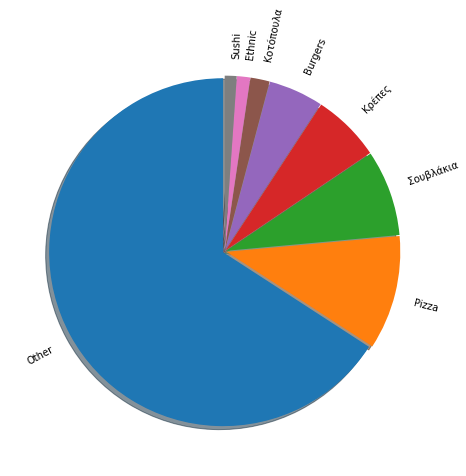

Other        0.66%
Pizza        0.11%
Σουβλάκια    0.08%
Κρέπες       0.06%
Burgers      0.05%
Κοτόπουλα    0.02%
Ethnic       0.01%
Sushi        0.01%
Name: Kind, dtype: object

In [163]:
# Show the kind of shops that has the highest average rating and more than 5 shops
temp_data = data.copy()
shops = data.Kind.value_counts().loc[data.Kind.value_counts() > 5].index
indices = []
for i in range(len(temp_data)):
    if not temp_data.iloc[i].Kind in shops:
        indices.append(i)
temp_data.drop(axis=0, index=indices, inplace=True)
temp_data.reset_index(inplace=True)
high_rating = temp_data.groupby("Kind").Rating.mean().sort_values(ascending=False).head(7).index
temp_col = temp_data.Kind.copy()
temp_col = temp_col.apply(lambda x: "Other" if not x in high_rating else x).value_counts()
plt.figure(figsize=(8,8))
explode = [0.01 for i in range(len(temp_col))]
plt.pie(temp_col, labels=temp_col.index, startangle=90, rotatelabels=True,
        explode=explode, shadow=True)
plt.show()
round(temp_col/temp_col.sum(),2).astype(str).apply(lambda x: x+"%")

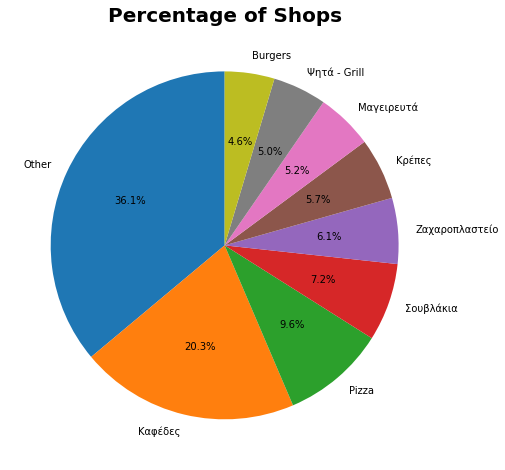

In [161]:
high_count = data.Kind.value_counts().loc[data.Kind.value_counts() > 35].index
temp_col = data.Kind.copy()
temp_col = temp_col.apply(lambda x: "Other" if not x in high_count else x).value_counts()
plt.figure(figsize=(8,8))
plt.pie(temp_col, labels=temp_col.index, autopct="%.1f%%", startangle=90)
plt.title("Percentage of Shops", fontsize=20, fontweight='bold')
plt.show()